In [17]:
%pip install -e .

ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: /home/doaa/Git/covid_xrays/notebooks
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt

# from covid_xrays_model import config

from fastai.vision import DatasetType
import pandas as pd
import joblib
from covid_xrays_model.processing.data_management import load_dataset
from covid_xrays_model.predict import predict_dataset
from covid_xrays_model.train_pipeline import run_training_sample

# Set your data path here

In [11]:
os.environ['DATA_DIR'] = '/home/doaa/Git/covid_xrays/data'

# FASTAI classification model

In [12]:
data = load_dataset(image_size=224, sample_size=5000)
data

ImageDataBunch;

Train: LabelList (9359 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pneumonia,pneumonia,pneumonia,pneumonia,pneumonia
Path: /home/doaa/Git/covid_xrays/data/processed;

Valid: LabelList (1039 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pneumonia,normal,pneumonia,normal,pneumonia
Path: /home/doaa/Git/covid_xrays/data/processed;

Test: None

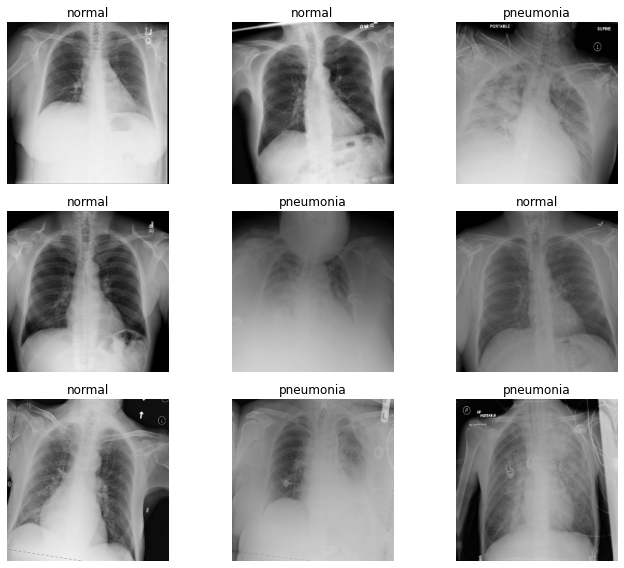

In [13]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Train)


In [5]:
# data.train_ds
data.classes, len(data.train_ds), len(data.valid_ds), data.c

(['COVID-19', 'normal', 'pneumonia'], 9359, 1039, 3)

In [6]:
# data.test_ds[0][0]

# Run training

epoch,train_loss,valid_loss,accuracy,time
0,1.416808,2.643306,0.633333,01:23


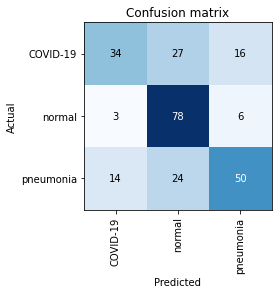

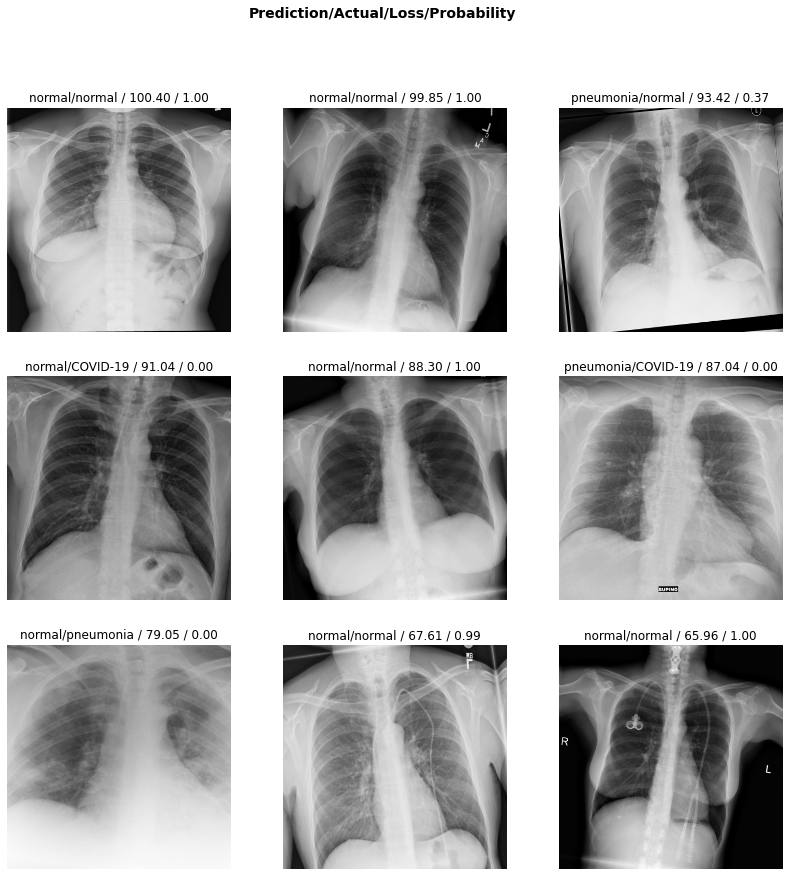

In [14]:
sample_size = 5000   # number of training images per class
percent_gan_images = 25  # 25%
confusion_matrix_filename = f'conf_mat_{sample_size}_{percent_gan_images}'

run_training_sample(n_cycles=1,
                    sample_size=sample_size, 
                    #percent_gan_images=percent_gan_images,   # Percent of GAN generated COVID images to add
                    confusion_matrix_filename=confusion_matrix_filename,
                    with_oversampling=True,   # always use True
                    with_weighted_loss=True,
                    with_focal_loss=False)

### Load training Confusion Matrix

In [15]:
train_mat = joblib.load(f'train{confusion_matrix_filename}.pkl')
# sum diagonal / all data_size *100
accuracy = np.trace(train_mat) / train_mat.sum() * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Confusion Matrix:\n {train_mat}')

Accuracy: 64.29%
Confusion Matrix:
 [[34 27 16]
 [ 3 78  6]
 [14 24 50]]


### For Validation confusion Matrix

In [9]:
valid_mat = joblib.load(f'valid_{confusion_matrix_filename}.pkl')
# sum diagonal / all data_size *100
accuracy = np.trace(valid_mat) / valid_mat.sum() * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Confusion Matrix:\n {valid_mat}')

Accuracy: 56.67%
Confusion Matrix:
 [[ 6  6  1]
 [ 0 11  0]
 [ 0  6  0]]


# Run evaluation (model has to be already trained) - slow on CPU

2020-11-16 14:16:19,025 — covid_xrays_model.processing.data_management — INFO —load_saved_learner:107 — Loading model from: covid_xrays_model_output_v0.0.3_oversampling_weighted_loss_100.pkl
2020-11-16 14:16:19,027 — covid_xrays_model.processing.data_management — INFO —load_saved_learner:108 — Device: cpu
Running predictions on 1579 data samples
200 images done..
400 images done..
600 images done..
800 images done..
1000 images done..
1200 images done..
1400 images done..
Building classification interpretation..
[[ 31  56  13]
 [ 11 872   2]
 [ 27 487  80]]
Accuracy: 62.254591513616205


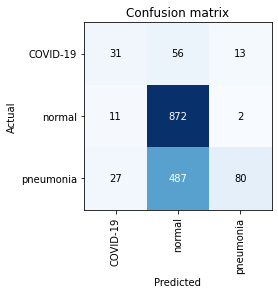

In [13]:
# Evaluate test set (ds_type='test')
# Will load the correct saved model based on the given parameters

test_conf_mat, test_accuracy = predict_dataset(ds_type='test', 
                                               cpu=True,   # set to False if running on GPUs
                                               sample_size=sample_size,  
                                               #percent_gan_images=percent_gan_images,
                                               with_oversampling=True,   # always use True
                                               with_weighted_loss=True,
                                               with_focal_loss=False,
                                               confusion_matrix_filename=confusion_matrix_filename
                                              )

In [18]:
test_conf_mat = joblib.load(f'test_{confusion_matrix_filename}.pkl')
# sum diagonal / all data_size *100
test_accuracy = np.trace(test_conf_mat) / test_conf_mat.sum() * 100

print(f'Test Accuracy: {test_accuracy:.2f}%')
print(f'Test Confusion Matrix:\n {test_conf_mat}') 

NameError: name 'confusion_matrix_filename' is not defined

# Play with the model

In [84]:
learn.predict(data.test_ds[0][0])

(Category tensor(2), tensor(2), tensor([0.0256, 0.3513, 0.6231]))